# Libs & Configs

In [ ]:
!pip install pandas-profiling==3.3.0

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale, StandardScaler, OneHotEncoder, OrdinalEncoder

/usr/local/lib/python3.10/dist-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/usr/local/lib/python3.10/dist-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


In [ ]:
from sklearn import set_config
set_config(display='diagram')

In [ ]:
df = pd.read_csv("/content/data.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


# EDA

In [ ]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Faz o Describe dos dados para entedermos eles
df.describe()

,Quantity,UnitPrice,CustomerID
count,148101.000000,148101.000000,102637.000000
mean,9.045820,5.190335,15290.355437
std,277.971709,103.308350,1735.859172
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13854.000000
50%,3.000000,2.460000,15192.000000
75%,10.000000,4.210000,16871.000000
max,74215.000000,16888.020000,18283.000000


In [ ]:
#Continuando a análise exploratória, podemos também usar o método info para encontrar o n° de valores nulos e os datatypes das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    535874 non-null  object 
 2   Description  534420 non-null  object 
 3   Quantity     535874 non-null  float64
 4   InvoiceDate  535874 non-null  object 
 5   UnitPrice    535874 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


# Data Cleaning

In [ ]:
#Primeiro, vamos contar quantos nulos existem para cada coluna
df.isna().sum()

InvoiceNo          0
StockCode       2218
Description     2815
Quantity        2218
InvoiceDate     2218
UnitPrice       2218
CustomerID     47682
Country         2218
dtype: int64

In [ ]:
#Vamos criar uma base df_null que será a df, porém sem todos valores nulos
df.dropna(inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403182 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    403182 non-null  object 
 1   StockCode    403182 non-null  object 
 2   Description  403182 non-null  object 
 3   Quantity     403182 non-null  float64
 4   InvoiceDate  403182 non-null  object 
 5   UnitPrice    403182 non-null  float64
 6   CustomerID   403182 non-null  float64
 7   Country      403182 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.7+ MB


In [ ]:
#Agora iremos criar uma base que não contenha valores de quantidade e preço iguais ou menores do que 0, para isso vamos usar o filtro de quantity e UNityPrice > 0
#  e então aplicar o describe para ver como fica nossa nova base df_clean
df = df[df['UnitPrice']>0]

In [ ]:
df = df[df['Quantity']>0]


df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394303 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    394303 non-null  object 
 1   StockCode    394303 non-null  object 
 2   Description  394303 non-null  object 
 3   Quantity     394303 non-null  float64
 4   InvoiceDate  394303 non-null  object 
 5   UnitPrice    394303 non-null  float64
 6   CustomerID   394303 non-null  float64
 7   Country      394303 non-null  object 
dtypes: float64(3), object(5)
memory usage: 27.1+ MB


In [ ]:
#Agora iremos remover as duplicadas e aplicar os métodos que já usamos para EDA:
df.drop_duplicates(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389156 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    389156 non-null  object 
 1   StockCode    389156 non-null  object 
 2   Description  389156 non-null  object 
 3   Quantity     389156 non-null  float64
 4   InvoiceDate  389156 non-null  object 
 5   UnitPrice    389156 non-null  float64
 6   CustomerID   389156 non-null  float64
 7   Country      389156 non-null  object 
dtypes: float64(3), object(5)
memory usage: 26.7+ MB


In [ ]:
#Agora iremos tratar os dados para garantir que todos estão nos tipos de dado corretos, que é o seguinte

# InvoiceNo object / str
# StockCode object / str
# Description object / str
# Quantity int
# InvoiceDate datetime
# UnitPrice float
# CustomerID int
# Country object / str

# Percebemos que as colunas de customerID e InvoiceDate estão incorretas, então vamos corrigí-las

df = df.astype({'CustomerID':int})
df = df.astype({'Quantity':int})
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389156 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    389156 non-null  object        
 1   StockCode    389156 non-null  object        
 2   Description  389156 non-null  object        
 3   Quantity     389156 non-null  int64         
 4   InvoiceDate  389156 non-null  datetime64[ns]
 5   UnitPrice    389156 non-null  float64       
 6   CustomerID   389156 non-null  int64         
 7   Country      389156 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 26.7+ MB


In [ ]:
# E por último, para tratar os outliers iremos usar o parâmetro pasasdo pelo case:
# quantidade do item na compra é superior a 10.000, e o preço unitário é maior que 5.000.

df = df[df['Quantity']<10000]
df = df[df['UnitPrice']<5000]

df.describe()

,Quantity,UnitPrice,CustomerID
count,389154.000000,389154.000000,389154.000000
mean,12.700586,3.117227,15287.898480
std,43.031803,18.134906,1713.989462
min,1.000000,0.001000,12347.000000
25%,2.000000,1.250000,13954.000000
50%,6.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,4800.000000,4161.060000,18287.000000


# Data Wrangling

In [ ]:
# Agora que temos todos os dados limpos podemos seguir para o Data Wrangling e criar features que serão necessárias para o nosso arquivo final de RFM
# O primeiro objeto que criaremos é uma coluna que calcule o preço total da venda registrada em cada linha

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


# Análise Gráfica e Cálculo de RFM

In [ ]:
#Primeiramente calcularemos os 10 países com mais vendas registradas
df_paises = df.groupby('Country')['TotalPrice'].sum().sort_values (ascending = False).reset_index()
df_paises = df_paises.head(10)
df_paises.head(10)

,Country,TotalPrice
0,United Kingdom,6986870.964
1,Netherlands,284023.860
2,EIRE,263656.760
3,Germany,227721.970
4,France,208600.960
5,Australia,136670.250
6,Spain,61401.240
7,Switzerland,56222.430
8,Belgium,41014.360
9,Sweden,38146.070


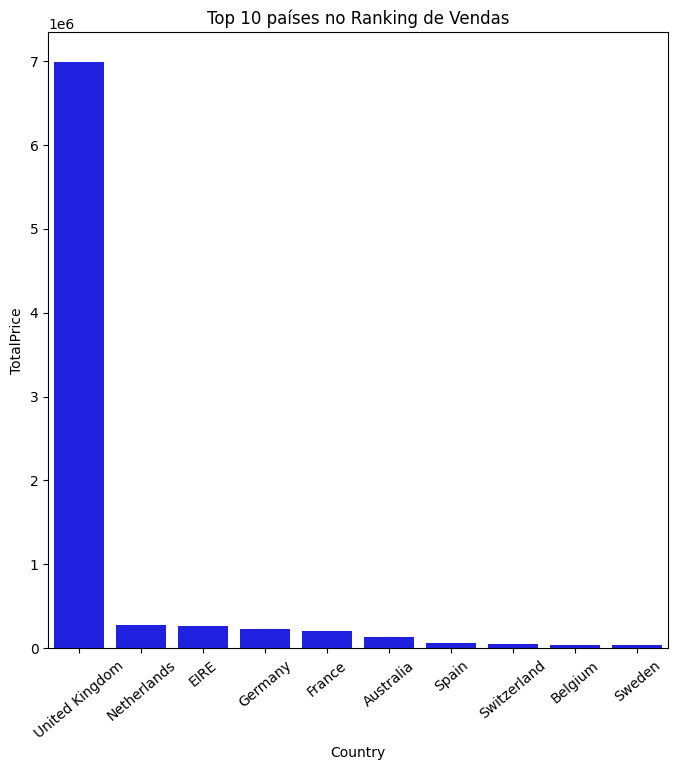

In [ ]:
# Para plotar o gráfico que mostra os top 10 países no Ranking de Vendas
plt.figure(figsize=(8, 8))
plt.xticks(rotation=40)
plt.title('Top 10 países no Ranking de Vendas')
sns.barplot(data=df_paises, x='Country', y='TotalPrice', color='blue')
plt.show()

In [ ]:
# Gráfico de Top 10 produtos mais vendidos

df_prod = df.groupby('Description')['Quantity'].sum().sort_values (ascending = False).reset_index()
df_prod = df_prod.head(10)
df_prod.head(10)

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1,JUMBO BAG RED RETROSPOT,46078
2,WHITE HANGING HEART T-LIGHT HOLDER,36706
3,ASSORTED COLOUR BIRD ORNAMENT,35263
4,PACK OF 72 RETROSPOT CAKE CASES,33670
5,POPCORN HOLDER,30919
6,RABBIT NIGHT LIGHT,27153
7,MINI PAINT SET VINTAGE,26076
8,PACK OF 12 LONDON TISSUES,25329
9,PACK OF 60 PINK PAISLEY CAKE CASES,24230


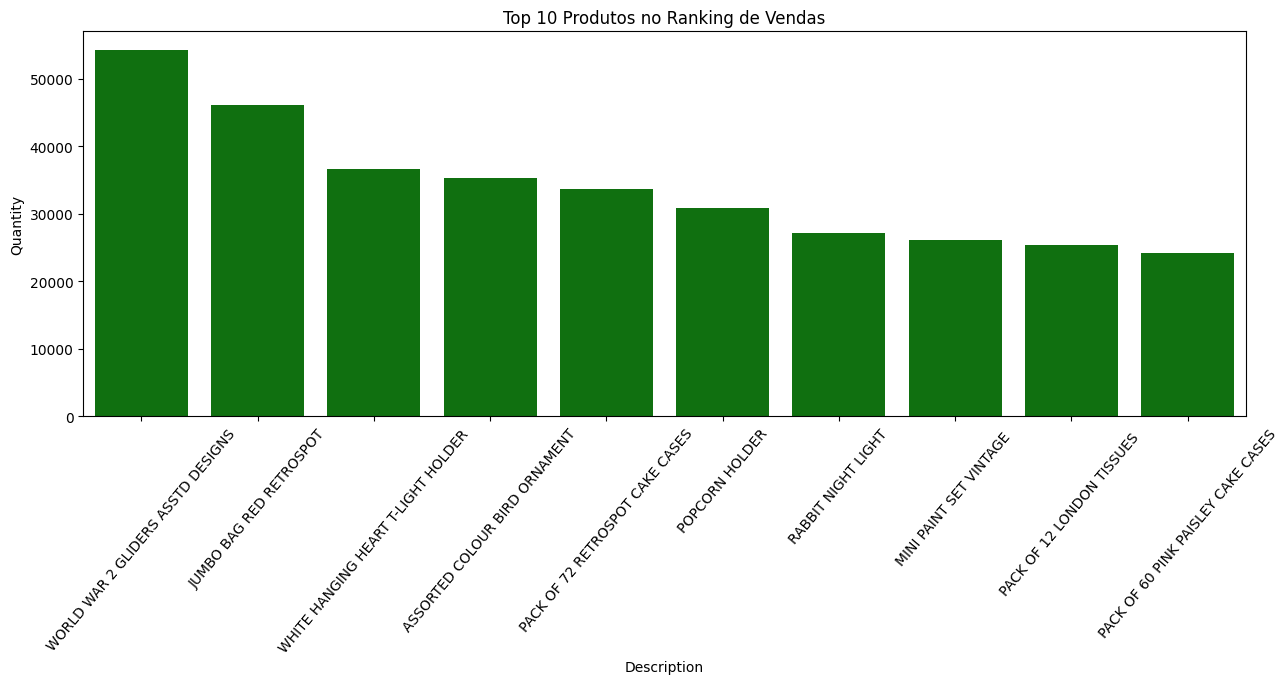

In [ ]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=50)
plt.title('Top 10 Produtos no Ranking de Vendas')
sns.barplot(data=df_prod, x='Description', y='Quantity', color='green')
plt.show()

In [ ]:
#Gráfico de Valor de venda total por mês

df['month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12


In [ ]:
df_mes = df.groupby('month')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
df_mes = df_mes.head(10)
df_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   month       10 non-null     int64  
 1   TotalPrice  10 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 288.0 bytes


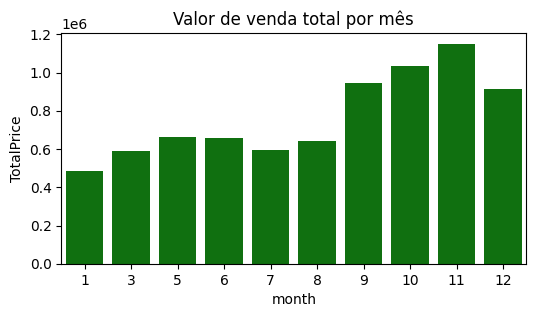

In [ ]:
plt.figure(figsize=(6, 3))
plt.title('Valor de venda total por mês')
sns.barplot(data=df_mes, x='month', y='TotalPrice', color='green')
plt.show()

In [ ]:
#Valor de venda total por mês e dos top 10 países no Ranking de vendas

df_mes_pais = df.groupby([ 'Country' , 'month'])['TotalPrice'].sum().sort_values(ascending = False).reset_index()
df_mes_pais.head()

,Country,month,TotalPrice
0,United Kingdom,11,970871.420
1,United Kingdom,10,817834.820
2,United Kingdom,12,793376.150
3,United Kingdom,9,791077.142
4,United Kingdom,5,538511.250


In [ ]:
vendas_top10 = df_mes_pais[df_mes_pais['Country'].isin(df_paises['Country'])]
vendas_top10.describe()

,month,TotalPrice
count,120.000000,120.000000
mean,6.500000,69202.740533
std,3.466527,183066.309594
min,1.000000,26.020000
25%,3.750000,3724.490000
50%,6.500000,9957.900000
75%,9.250000,23201.022500
max,12.000000,970871.420000


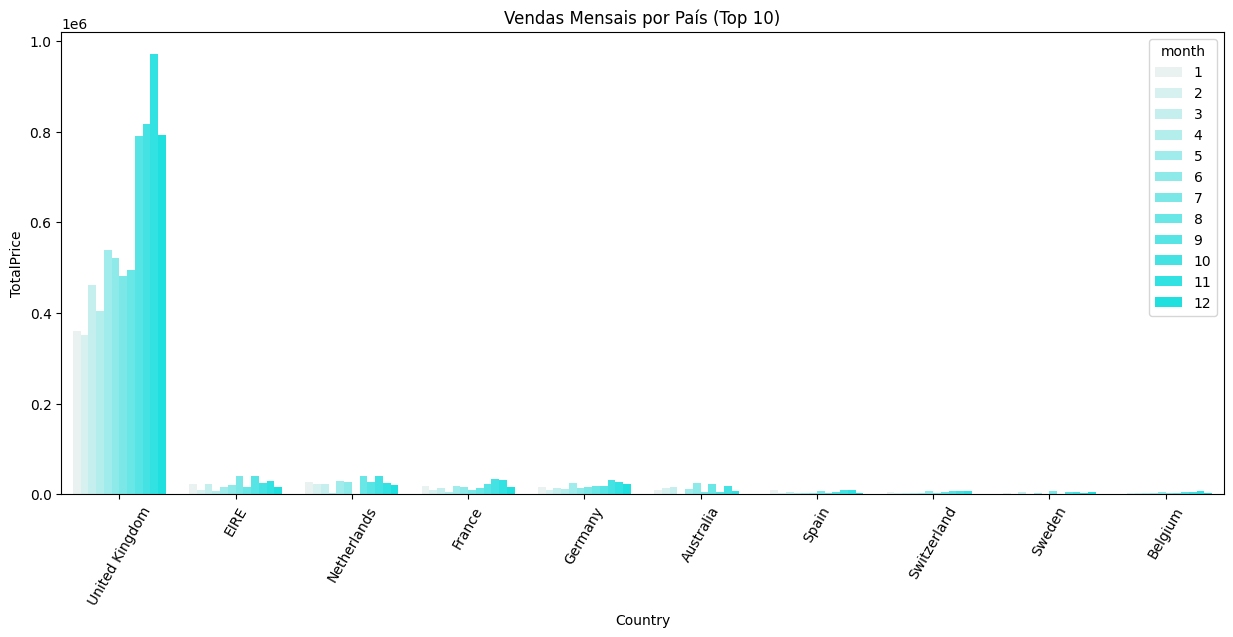

In [ ]:
plt.figure(figsize= (15, 6))
plt.xticks(rotation = 60)
plt.title('Vendas Mensais por País (Top 10)')
sns.barplot(data= vendas_top10 , x='Country', y='TotalPrice', hue = 'month' , color='cyan')
plt.show()

# Cálculo do RFM

In [ ]:
# Vamos calcular de data máxima de compra para usarmos como base para o cálculo de recência
max_date = df['InvoiceDate'].max()
print('A data máxima de venda é', max_date)

A data máxima de venda é 2011-12-09 12:50:00


In [ ]:
# Dica: Agrupe os dados por cliente e pedido/compra (InvoiceNo) e obtenha a
# data e o preço total do pedido.
# Com isso, agrupe novamente apenas por cliente e calcule o RFM, onde:
# - R é a recência, diferença em dias da última compra do cliente e da última
# compra disponível no conjunto de dados, que calcularam previamente.
# - F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
# - M é o ticket médio, ou seja, a média das compras feitas pelo cliente.
# Calculo do RFM

rfm = round(df.groupby(['CustomerID']).agg({'InvoiceDate':lambda x: (max_date - x.max()).days,'InvoiceNo':'count','TotalPrice':'mean'}),2)
rfm = rfm.rename(columns={'InvoiceDate':'Recência','InvoiceNo':'Frequência','TotalPrice':'Ticket_medio'})
rfm.head()

,Recência,Frequência,ticket_medio
CustomerID,,,
12347,1,181,23.76
12348,74,31,57.98
12349,18,73,24.08
12350,309,17,19.67
12352,35,85,29.48
